In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
drug_dataframe = pd.read_csv('cnsdrugs/data/EPA-DSSTOX/fda_prop.xls',sep='\t')
drug_dataframe

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES
0,ZINC00000018,212.318,2.00,5.91,-8.69,1,3,32,0,4,CC(C)C[C@@H]1C(=O)N(C(=S)N1)CC=C
1,ZINC00000036,151.141,0.37,2.61,-46.53,1,3,60,-1,2,c1ccc(cc1)[C@@H](C(=O)[O-])O
2,ZINC00000053,179.151,1.43,5.65,-56.66,0,4,66,-1,3,CC(=O)Oc1ccccc1C(=O)[O-]
3,ZINC00000061,213.664,-0.42,3.92,-52.87,3,3,68,0,4,c1cc(ccc1[C@@H](CC(=O)[O-])C[NH3+])Cl
4,ZINC00000070,300.721,4.53,-0.61,-46.43,0,4,66,-1,3,C[C@@H](c1ccc2c(c1)nc(o2)c3ccc(cc3)Cl)C(=O)[O-]
...,...,...,...,...,...,...,...,...,...,...,...
3175,ZINC15848267,392.467,2.09,2.69,-17.09,3,5,95,0,2,C[C@H]1C[C@@H]2[C@@H]3C[C@H](C4=CC(=O)C=C[C@]4...
3176,ZINC15848268,392.467,2.09,3.20,-16.23,3,5,95,0,2,C[C@@H]1C[C@H]2[C@@H]3C[C@H](C4=CC(=O)C=C[C@]4...
3177,ZINC15848269,392.467,2.09,2.89,-14.46,3,5,95,0,2,C[C@H]1C[C@H]2[C@@H]3C[C@H](C4=CC(=O)C=C[C@]4(...
3178,ZINC15848271,312.864,5.08,13.35,-41.48,1,1,4,1,5,c1ccc(cc1)/C(=C/C[NH+]2CCCC2)/Cc3ccc(cc3)Cl


In [4]:
drug_dataframe.sort_values('NRB', ascending=False)

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES
1320,ZINC03830276,603.750,1.57,-4.15,-20.52,1,12,121,0,33,CCCCNc1ccc(cc1)C(=O)OCCOCCOCCOCCOCCOCCOCCOCCOCCOC
2601,ZINC08101159,495.745,9.76,3.84,-18.66,1,6,81,0,23,CCCCCCCCCCC[C@@H](C[C@@H]1[C@@H](C(=O)O1)CCCCC...
1621,ZINC03830635,561.701,-1.31,-10.48,-65.57,8,14,207,1,23,CC(=O)N(CCCCCNC(=O)CCC(=O)N(CCCCCNC(=O)CCC(=O)...
2604,ZINC08101162,495.745,9.76,3.72,-17.86,1,6,81,0,23,CCCCCCCCCCC[C@H](C[C@H]1[C@@H](C(=O)O1)CCCCCC)...
2603,ZINC08101161,495.745,9.76,3.84,-12.85,1,6,81,0,23,CCCCCCCCCCC[C@@H](C[C@H]1[C@@H](C(=O)O1)CCCCCC...
...,...,...,...,...,...,...,...,...,...,...,...
1220,ZINC03812897,296.410,3.66,-1.04,-5.88,2,2,40,0,0,C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CC[C@]...
2474,ZINC05735567,312.453,3.54,1.22,-6.37,1,2,37,0,0,C[C@@H]1CC2=C(CCC(=O)C2)[C@@H]3[C@H]1[C@@H]4CC...
741,ZINC01041156,274.404,3.00,7.58,-5.96,1,2,37,0,0,C[C@@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C...
734,ZINC00968337,291.418,3.47,1.61,-35.90,1,2,17,1,0,C[NH+]1CCC(=C2c3ccccc3CCc4c2nccc4)CC1


In [5]:
def mol_from_smiles(item):
    return Chem.MolFromSmiles(item)

drug_dataframe['rdkit_object'] = drug_dataframe['SMILES'].apply(mol_from_smiles)

<Axes: >

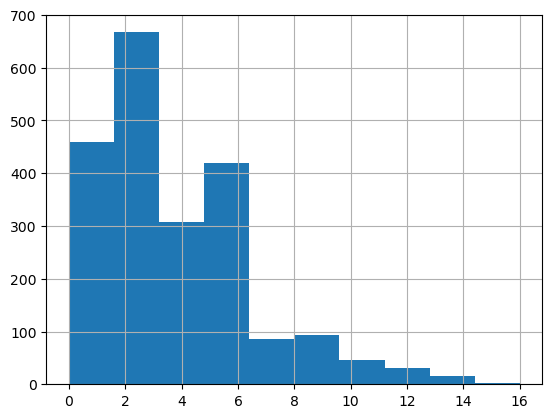

In [6]:
Mw_bool = drug_dataframe['MWT' ] < 400
drug_dataframe = drug_dataframe[Mw_bool]
drug_dataframe['NRB'].hist()


In [7]:
nrb_filter = drug_dataframe['NRB'] > 6
drug_dataframe = drug_dataframe[nrb_filter]
drug_dataframe

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES,rdkit_object
23,ZINC00000257,296.387,2.06,-1.05,-44.37,3,5,72,1,10,CC(C)[NH2+]C[C@H](COc1ccc(cc1)CCC(=O)OC)O,<rdkit.Chem.rdchem.Mol object at 0x149a323b0>
27,ZINC00000276,277.432,3.13,2.41,-33.39,2,3,33,1,7,CCC[NH+](CC)[C@@H](CC)C(=O)Nc1c(cccc1C)C,<rdkit.Chem.rdchem.Mol object at 0x149a325e0>
37,ZINC00000380,297.398,3.86,2.98,-8.13,0,3,39,0,7,CC(C)Cc1ccc(cc1)[C@H](C)C(=O)OCc2ccccn2,<rdkit.Chem.rdchem.Mol object at 0x149a32a40>
38,ZINC00000407,302.394,2.77,-3.11,-38.26,4,4,66,1,7,C[C@H](COc1ccccc1)[NH2+][C@@H](C)[C@H](c2ccc(c...,<rdkit.Chem.rdchem.Mol object at 0x149a32ab0>
40,ZINC00000416,329.420,2.85,-5.28,-59.36,6,5,100,1,8,C[C@H](CCc1ccccc1)[NH2+]C[C@H](c2ccc(c(c2)C(=O...,<rdkit.Chem.rdchem.Mol object at 0x149a32b90>
...,...,...,...,...,...,...,...,...,...,...,...,...
3129,ZINC15848220,367.506,3.50,5.05,-53.35,3,5,101,-1,12,CCCCC[C@@](C)(/C=C/[C@H]1[C@H](C[C@H]([C@@H]1C...,<rdkit.Chem.rdchem.Mol object at 0x149ab3df0>
3150,ZINC15848242,351.463,3.83,6.26,-49.51,2,5,90,-1,10,CCCCC[C@H](/C=C/[C@H]1[C@H](C[C@H]2[C@@H]1C/C(...,<rdkit.Chem.rdchem.Mol object at 0x149ab47b0>
3151,ZINC15848243,351.463,3.83,6.31,-48.56,2,5,90,-1,10,CCCCC[C@@H](/C=C/[C@H]1[C@H](C[C@H]2[C@@H]1C/C...,<rdkit.Chem.rdchem.Mol object at 0x149ab4820>
3168,ZINC15848260,382.541,3.88,8.30,-10.62,2,5,84,0,14,CCCC[C@](C)(C/C=C/[C@H]1[C@H](CC(=O)[C@@H]1CCC...,<rdkit.Chem.rdchem.Mol object at 0x149ab4f90>


[<rdkit.Chem.rdchem.Mol object at 0x149a323b0>, <rdkit.Chem.rdchem.Mol object at 0x149a325e0>, <rdkit.Chem.rdchem.Mol object at 0x149a32a40>, <rdkit.Chem.rdchem.Mol object at 0x149a32ab0>, <rdkit.Chem.rdchem.Mol object at 0x149a32b90>, <rdkit.Chem.rdchem.Mol object at 0x149a33840>, <rdkit.Chem.rdchem.Mol object at 0x149a60200>, <rdkit.Chem.rdchem.Mol object at 0x149a60ba0>, <rdkit.Chem.rdchem.Mol object at 0x149a61770>, <rdkit.Chem.rdchem.Mol object at 0x149a622d0>, <rdkit.Chem.rdchem.Mol object at 0x149a623b0>, <rdkit.Chem.rdchem.Mol object at 0x149a62c70>, <rdkit.Chem.rdchem.Mol object at 0x149a63290>, <rdkit.Chem.rdchem.Mol object at 0x149a63370>, <rdkit.Chem.rdchem.Mol object at 0x149a63ca0>, <rdkit.Chem.rdchem.Mol object at 0x149a64740>, <rdkit.Chem.rdchem.Mol object at 0x149a64900>, <rdkit.Chem.rdchem.Mol object at 0x149a64e40>, <rdkit.Chem.rdchem.Mol object at 0x149a65930>, <rdkit.Chem.rdchem.Mol object at 0x149a67e60>, <rdkit.Chem.rdchem.Mol object at 0x149a68200>, <rdkit.Chem.

/Users/localadmin/miniforge3/envs/espaloma_charge/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


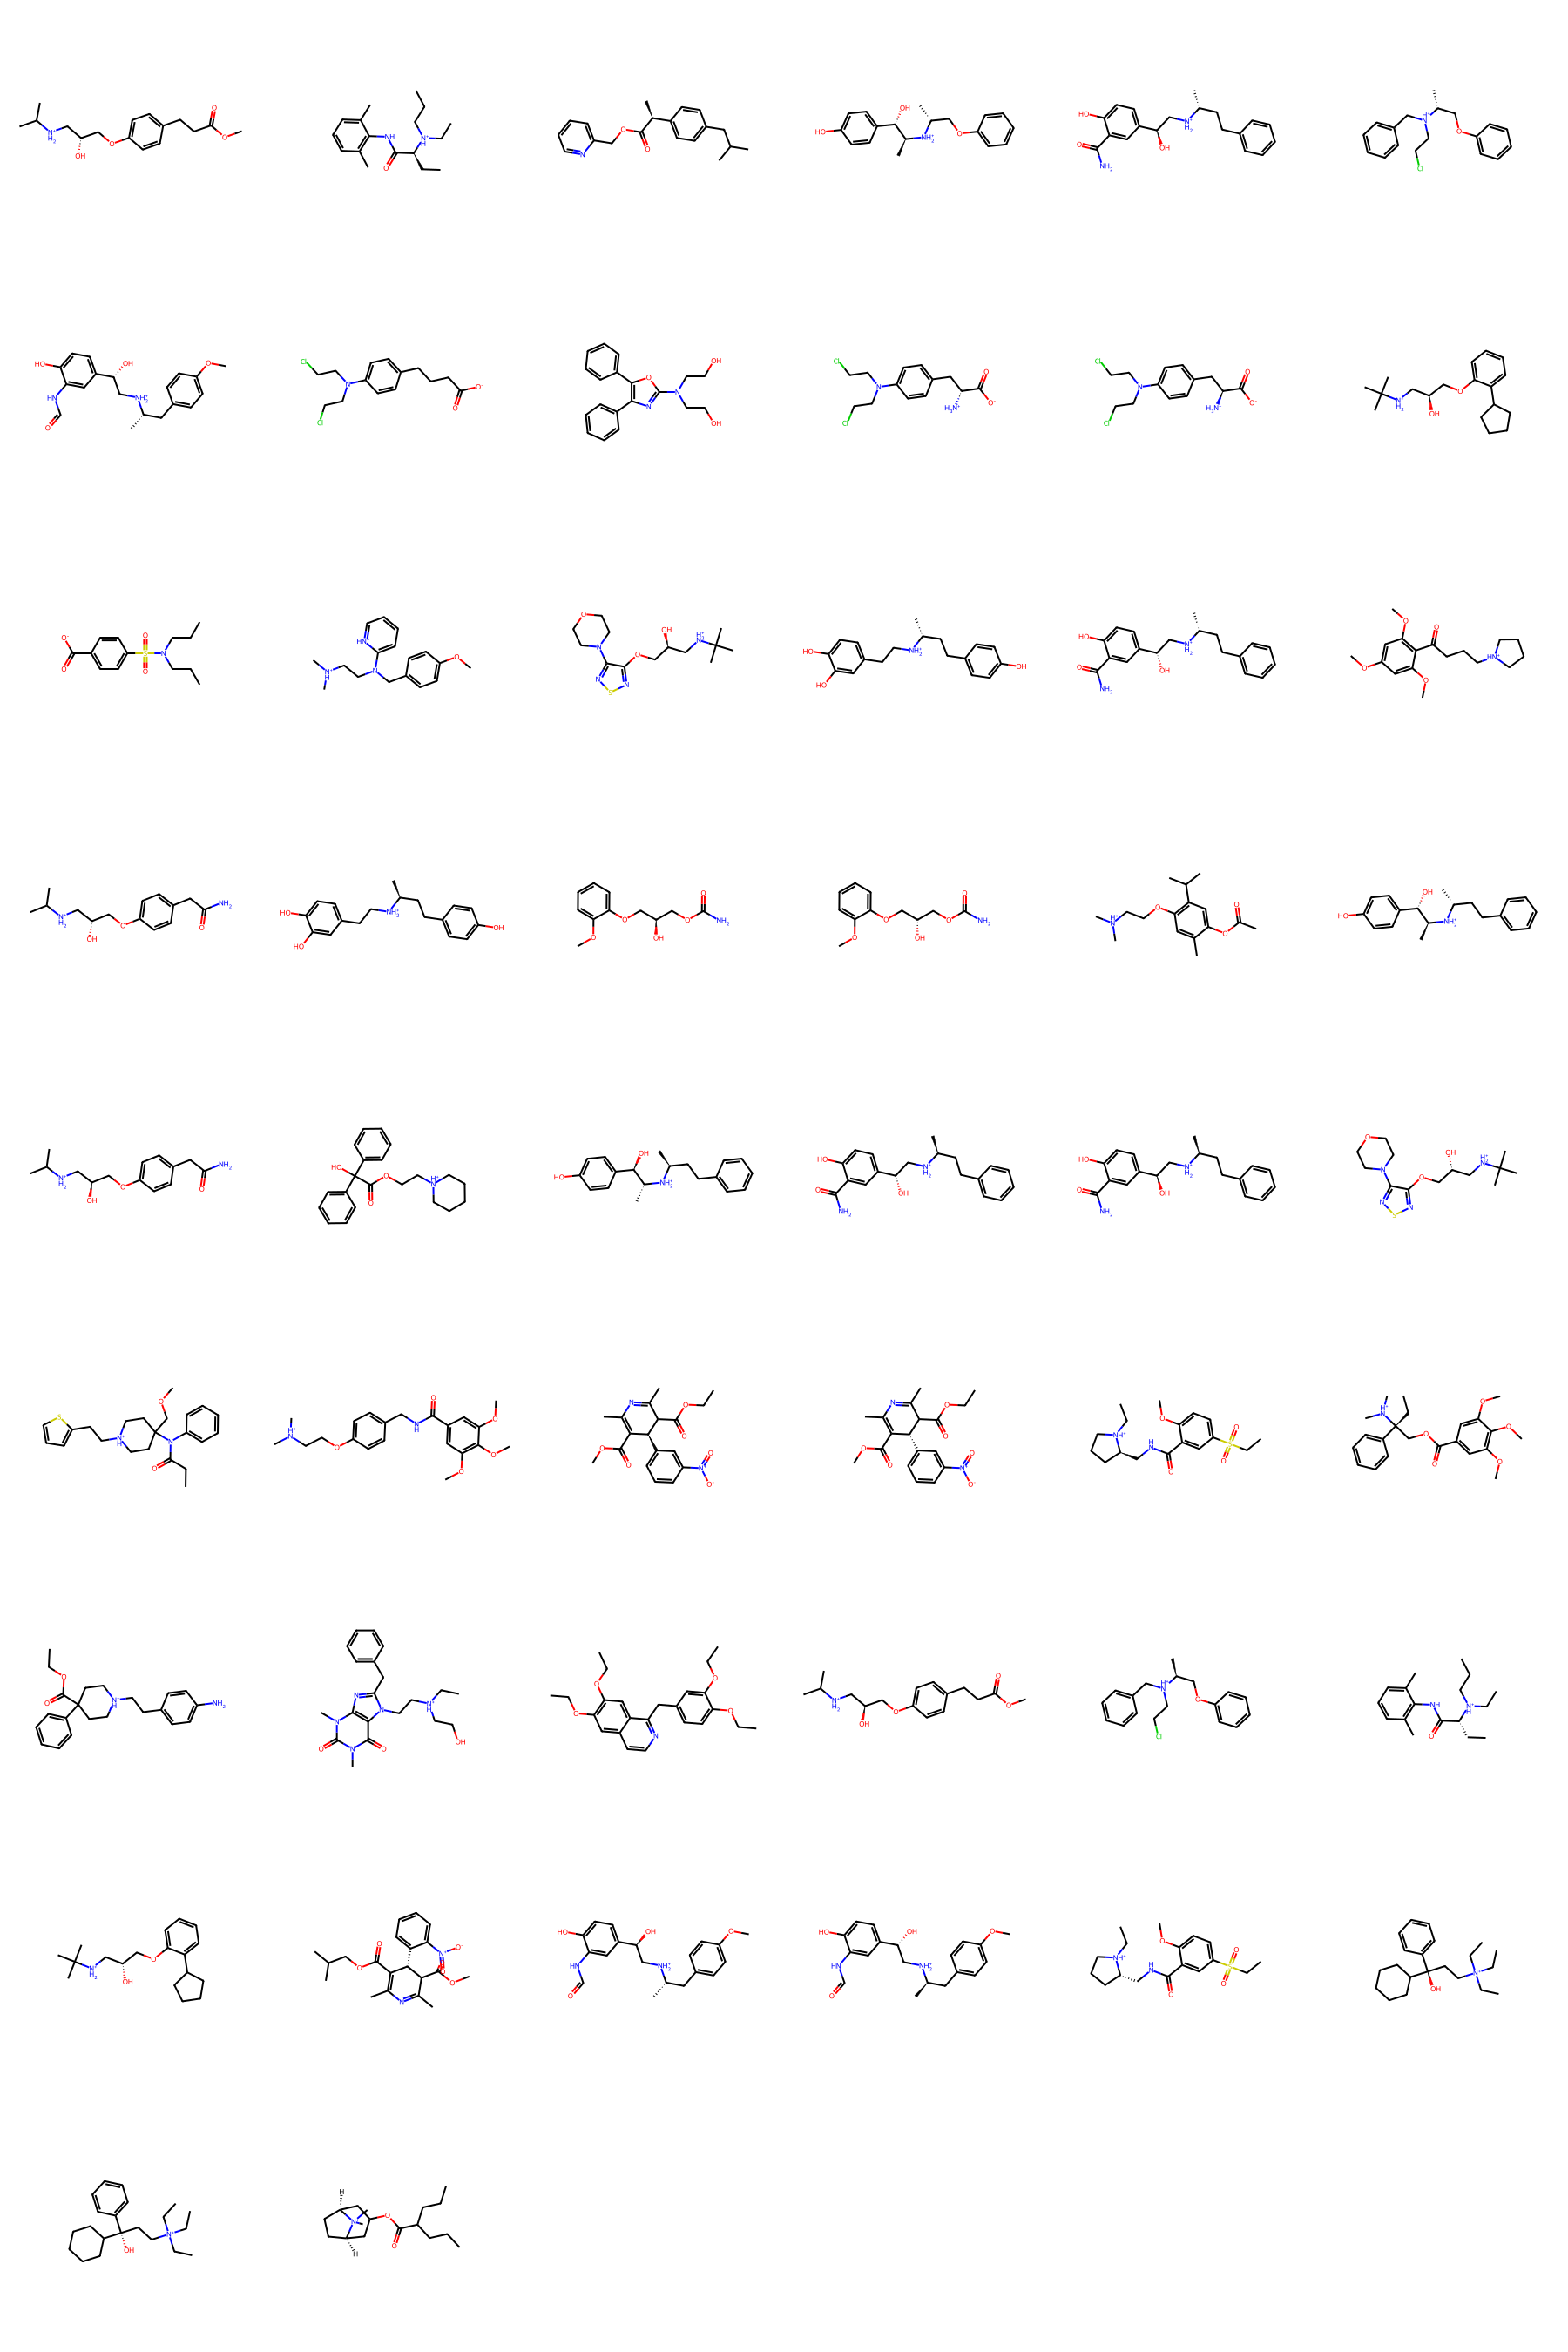

In [ ]:
images = []
for molecule in drug_dataframe['rdkit_object']:
    images.append(molecule)

print(images)
img = Draw.MolsToGridImage(images, molsPerRow=6, subImgSize=(300, 300))
img

In [13]:
drug_dataframe_picked = drug_dataframe.sample(50)
drug_dataframe_picked

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES,rdkit_object
784,ZINC01529266,296.552,3.71,-0.54,-13.14,0,2,6,0,9,CCN(CC)C(=S)SSC(=S)N(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x149a73370>
872,ZINC01530769,340.487,4.98,4.59,-33.91,1,3,30,1,9,CCC(=O)O[C@](Cc1ccccc1)(c2ccccc2)[C@H](C)C[NH+...,<rdkit.Chem.rdchem.Mol object at 0x149a75a80>
1018,ZINC01847743,290.427,4.03,3.78,-34.38,1,3,30,1,8,CC[NH+](CC)CCOC(=O)C1(CCCC1)c2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x149a79a80>
2992,ZINC11677473,371.302,-1.15,-0.17,-18.78,1,12,156,0,8,CC(=O)OC[C@@H]1[C@H]([C@@H]([C@H](O1)n2c(=O)[n...,<rdkit.Chem.rdchem.Mol object at 0x149ab0200>
2131,ZINC03831267,383.376,1.95,-3.00,-25.69,1,7,86,0,7,COc1ccnc(c1OC)C[S@](=O)c2[nH]c3cc(ccc3n2)OC(F)F,<rdkit.Chem.rdchem.Mol object at 0x149a985f0>
733,ZINC00968336,326.504,5.51,1.99,-35.05,2,2,24,1,7,Cc1ccc(c(c1)[C@H](CC[NH+](C(C)C)C(C)C)c2ccccc2)O,<rdkit.Chem.rdchem.Mol object at 0x149a71d20>
1006,ZINC01734034,328.432,2.95,1.65,-36.43,2,4,50,1,9,CC[NH+](CC)CCOC(=O)C(c1ccccc1)(c2ccccc2)O,<rdkit.Chem.rdchem.Mol object at 0x149a79540>
565,ZINC00601298,355.480,1.71,-3.65,-46.70,2,6,76,1,7,CC[NH+]1CCC[C@@H]1CNC(=O)c2cc(ccc2OC)S(=O)(=O)CC,<rdkit.Chem.rdchem.Mol object at 0x149a6d310>
1742,ZINC03830779,384.560,6.57,1.56,-7.30,1,3,46,0,7,CCCCCCC(=O)O[C@H]1CC[C@@H]2[C@@]1(CC[C@@H]3[C@...,<rdkit.Chem.rdchem.Mol object at 0x149a8da10>
1090,ZINC02033841,333.408,2.01,-0.18,-55.73,1,6,89,-1,10,CCCN(CCC)C(=O)[C@H](CCC(=O)[O-])NC(=O)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x149a7ba00>


In [28]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit.Chem import rdFingerprintGenerator
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3)

def GetFingerprint(item):
    return fpgen.GetFingerprint(item)


drug_dataframe['MorganFingerPrint'] = drug_dataframe['rdkit_object'].apply(GetFingerprint)


drug_dataframe

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES,rdkit_object,MorganFingerPrint
23,ZINC00000257,296.387,2.06,-1.05,-44.37,3,5,72,1,10,CC(C)[NH2+]C[C@H](COc1ccc(cc1)CCC(=O)OC)O,<rdkit.Chem.rdchem.Mol object at 0x149a323b0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
27,ZINC00000276,277.432,3.13,2.41,-33.39,2,3,33,1,7,CCC[NH+](CC)[C@@H](CC)C(=O)Nc1c(cccc1C)C,<rdkit.Chem.rdchem.Mol object at 0x149a325e0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
37,ZINC00000380,297.398,3.86,2.98,-8.13,0,3,39,0,7,CC(C)Cc1ccc(cc1)[C@H](C)C(=O)OCc2ccccn2,<rdkit.Chem.rdchem.Mol object at 0x149a32a40>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
38,ZINC00000407,302.394,2.77,-3.11,-38.26,4,4,66,1,7,C[C@H](COc1ccccc1)[NH2+][C@@H](C)[C@H](c2ccc(c...,<rdkit.Chem.rdchem.Mol object at 0x149a32ab0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40,ZINC00000416,329.420,2.85,-5.28,-59.36,6,5,100,1,8,C[C@H](CCc1ccccc1)[NH2+]C[C@H](c2ccc(c(c2)C(=O...,<rdkit.Chem.rdchem.Mol object at 0x149a32b90>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,ZINC15848220,367.506,3.50,5.05,-53.35,3,5,101,-1,12,CCCCC[C@@](C)(/C=C/[C@H]1[C@H](C[C@H]([C@@H]1C...,<rdkit.Chem.rdchem.Mol object at 0x149ab3df0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3150,ZINC15848242,351.463,3.83,6.26,-49.51,2,5,90,-1,10,CCCCC[C@H](/C=C/[C@H]1[C@H](C[C@H]2[C@@H]1C/C(...,<rdkit.Chem.rdchem.Mol object at 0x149ab47b0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3151,ZINC15848243,351.463,3.83,6.31,-48.56,2,5,90,-1,10,CCCCC[C@@H](/C=C/[C@H]1[C@H](C[C@H]2[C@@H]1C/C...,<rdkit.Chem.rdchem.Mol object at 0x149ab4820>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3168,ZINC15848260,382.541,3.88,8.30,-10.62,2,5,84,0,14,CCCC[C@](C)(C/C=C/[C@H]1[C@H](CC(=O)[C@@H]1CCC...,<rdkit.Chem.rdchem.Mol object at 0x149ab4f90>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [34]:

picker = MaxMinPicker()
pickIndices = picker.LazyBitVectorPick(list(drug_dataframe['MorganFingerPrint']),len(drug_dataframe['MorganFingerPrint']),50,seed=23)
picked_index=  list(pickIndices)

In [37]:
picked_df =  drug_dataframe.iloc[picked_index]


[<rdkit.Chem.rdchem.Mol object at 0x149a7eab0>, <rdkit.Chem.rdchem.Mol object at 0x149a76ff0>, <rdkit.Chem.rdchem.Mol object at 0x149aa6180>, <rdkit.Chem.rdchem.Mol object at 0x149a75070>, <rdkit.Chem.rdchem.Mol object at 0x149a842e0>, <rdkit.Chem.rdchem.Mol object at 0x149a8ec00>, <rdkit.Chem.rdchem.Mol object at 0x149a7f4c0>, <rdkit.Chem.rdchem.Mol object at 0x149a73370>, <rdkit.Chem.rdchem.Mol object at 0x149a74ac0>, <rdkit.Chem.rdchem.Mol object at 0x149a95af0>, <rdkit.Chem.rdchem.Mol object at 0x149a78eb0>, <rdkit.Chem.rdchem.Mol object at 0x149a75bd0>, <rdkit.Chem.rdchem.Mol object at 0x149a63ca0>, <rdkit.Chem.rdchem.Mol object at 0x149a903c0>, <rdkit.Chem.rdchem.Mol object at 0x149a77bc0>, <rdkit.Chem.rdchem.Mol object at 0x149a8d9a0>, <rdkit.Chem.rdchem.Mol object at 0x149a786d0>, <rdkit.Chem.rdchem.Mol object at 0x149a8e9d0>, <rdkit.Chem.rdchem.Mol object at 0x149a63290>, <rdkit.Chem.rdchem.Mol object at 0x149a70350>, <rdkit.Chem.rdchem.Mol object at 0x149a74890>, <rdkit.Chem.

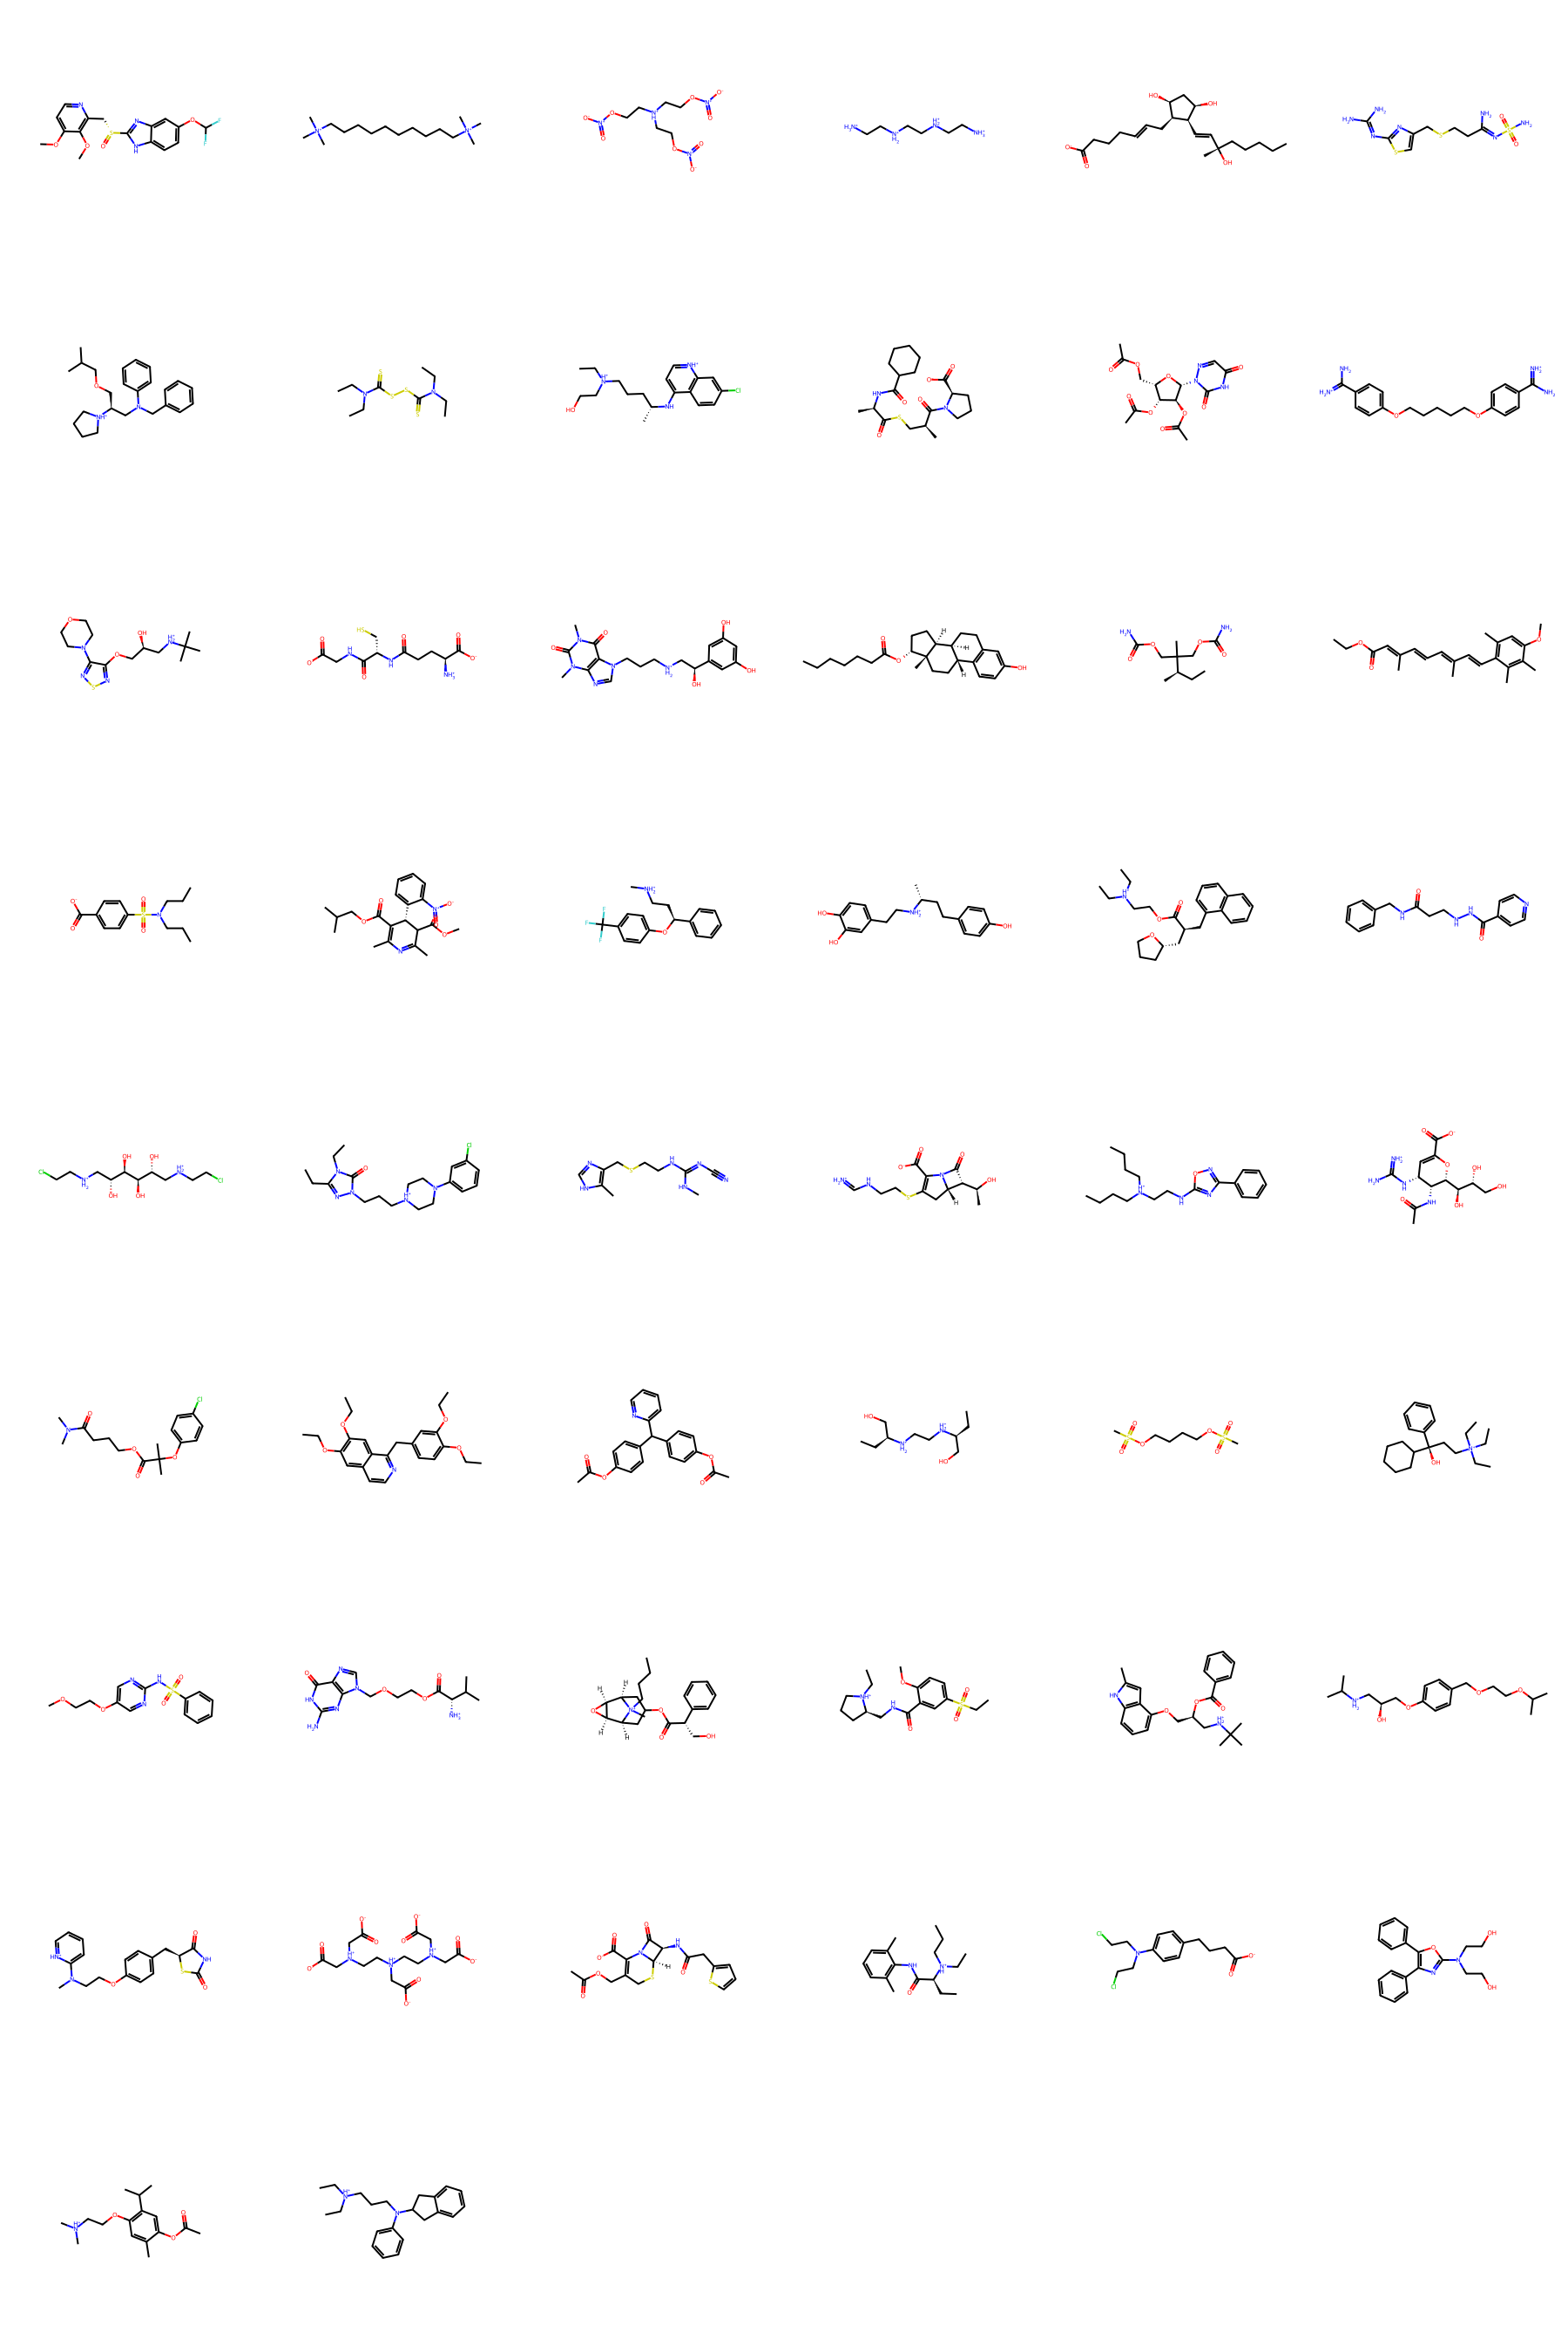

In [38]:
images = []
for molecule in picked_df['rdkit_object']:
    images.append(molecule)

print(images)
img = Draw.MolsToGridImage(images, molsPerRow=6, subImgSize=(300, 300))
img

In [41]:
list(picked_df['SMILES'])

['COc1ccnc(c1OC)C[S@@](=O)c2[nH]c3ccc(cc3n2)OC(F)F',
 'C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C',
 'C(CO[N+](=O)[O-])[NH+](CCO[N+](=O)[O-])CCO[N+](=O)[O-]',
 'C(C[NH2+]CC[NH2+]CC[NH3+])[NH3+]',
 'CCCCC[C@@](C)(/C=C/[C@@H]1[C@@H](C[C@@H]([C@@H]1CC=CCCCC(=O)[O-])O)O)O',
 'c1c(nc(s1)N=C(N)N)CSCC/C(=N/S(=O)(=O)N)/N',
 'CC(C)COC[C@@H](CN(Cc1ccccc1)c2ccccc2)[NH+]3CCCC3',
 'CCN(CC)C(=S)SSC(=S)N(CC)CC',
 'CC[NH+](CCC[C@@H](C)Nc1cc[nH+]c2c1ccc(c2)Cl)CCO',
 'C[C@@H](CSC(=O)[C@@H](C)NC(=O)C1CCCCC1)C(=O)N2CCC[C@@H]2C(=O)[O-]',
 'CC(=O)OC[C@H]1[C@H]([C@@H]([C@H](O1)n2c(=O)[nH]c(=O)cn2)OC(=O)C)OC(=O)C',
 'c1cc(ccc1C(=[NH2+])N)OCCCCCOc2ccc(cc2)C(=[NH2+])N',
 'CC(C)(C)[NH2+]C[C@@H](COc1c(nsn1)N2CCOCC2)O',
 'C(CC(=O)N[C@@H](CS)C(=O)NCC(=O)[O-])[C@@H](C(=O)[O-])[NH3+]',
 'Cn1c2c(c(=O)n(c1=O)C)n(cn2)CCC[NH2+]C[C@@H](c3cc(cc(c3)O)O)O',
 'CCCCCCC(=O)O[C@@H]1CC[C@@H]2[C@@]1(CC[C@@H]3[C@@H]2CCc4c3ccc(c4)O)C',
 'CC[C@@H](C)C(C)(COC(=O)N)COC(=O)N',
 'CCOC(=O)/C=C(\\C)/C=C/C=C(\\C)/C=C/c1c(cc(c(c1C)C)OC)C',
 'CCCN(CCC)